In [1]:
# calculate probability of detection

In [2]:
from random import randint
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [24]:
NUM_EQUIV_VOLUMES = 1000 # number of locations to place civilizations
MAX_CIVS = 5000 # max number of advanced civilizations
TRIALS = 1000 # number of times to model a given number of civilizations
CIV_STEP_SIZE = 100 # civilization count step size

x = [] # x values for polynomial fit
y = [] # y values for polynomial fit

for num_civs in range(2, MAX_CIVS + 2, CIV_STEP_SIZE):
    civs_per_vol = num_civs / NUM_EQUIV_VOLUMES
    num_single_civs = 0
    for trial in range(TRIALS):
        locations = [] # equivalant volumes contaiing civilizations
        while len(locations) < num_civs:
            location = randint(1, NUM_EQUIV_VOLUMES)
            locations.append(location)
        overlap_count = Counter(locations)
        overlap_rollup = Counter(overlap_count.values())
        num_single_civs += overlap_rollup[1]

    
    prob = 1 - (num_single_civs / (num_civs * TRIALS))
    
    #print ratio of civs-per-volume vs probability of 2+ civs per location
    print("{:.4f} {:.4f}".format(civs_per_vol, prob))
    x.append(civs_per_vol)
    y.append(prob)

0.0020 0.0000
0.1020 0.0982
0.2020 0.1832
0.3020 0.2603
0.4020 0.3310
0.5020 0.3927
0.6020 0.4517
0.7020 0.5036
0.8020 0.5515
0.9020 0.5943
1.0020 0.6324
1.1020 0.6668
1.2020 0.6995
1.3020 0.7280
1.4020 0.7533
1.5020 0.7773
1.6020 0.7986
1.7020 0.8178
1.8020 0.8353
1.9020 0.8506
2.0020 0.8650
2.1020 0.8781
2.2020 0.8892
2.3020 0.8999
2.4020 0.9098
2.5020 0.9181
2.6020 0.9259
2.7020 0.9331
2.8020 0.9393
2.9020 0.9452
3.0020 0.9502
3.1020 0.9551
3.2020 0.9595
3.3020 0.9631
3.4020 0.9667
3.5020 0.9699
3.6020 0.9728
3.7020 0.9754
3.8020 0.9777
3.9020 0.9797
4.0020 0.9817
4.1020 0.9835
4.2020 0.9851
4.3020 0.9864
4.4020 0.9878
4.5020 0.9890
4.6020 0.9900
4.7020 0.9909
4.8020 0.9918
4.9020 0.9925



           4           3          2
-0.004715 x + 0.06633 x - 0.3586 x + 0.9184 x + 0.009856


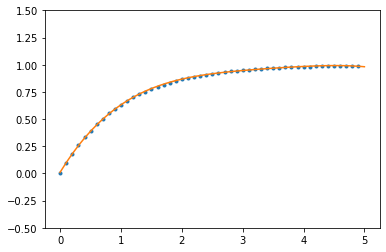

In [26]:
#generate predictive formula
coefficients = np.polyfit(x, y, 4) #4th order loynomial fit
p = np.poly1d(coefficients)
print("\n{}".format(p))
xp = np.linspace(0,5)
_ = plt.plot(x,y, '.', xp, p(xp), '-')
plt.ylim(-0.5, 1.5)
plt.show()

In [27]:
# drwaing galaxy

In [29]:
import tkinter as tk
from random import randint, uniform, random
import math

In [30]:
#====================================================================================
#MAIN INPUT

#Scale (radio bubble diameter) in light years
SCALE = 225 # enter 225 to see Earths radio bubble

# number of advanced civs from drake equation
NUM_CIVS = 15600000
#===================================================================================

In [73]:
# set up display canvas
root = tk.Tk()
root.title("Milky Way Galaxy")
c = tk.Canvas(root, width=1000, height=800, bg='black')
c.grid()
c.configure(scrollregion=(-500, -400, 500, 400))

# actuall milky way dimensions (light years)
DISC_RADIUS = 50000
DISC_HEIGHT = 1000
DISC_VOL = math.pi * DISC_RADIUS**2 * DISC_HEIGHT

In [74]:
def scale_galaxy():
    """Scale galaxy dimensions based on radius bubble size"""
    disc_radius_scaled = round(DISC_RADIUS / SCALE)
    bubble_vol = 4/3 * math.pi * (SCALE / 2)**3
    disc_vol_scaled = DISC_VOL/bubble_vol
    return disc_radius_scaled, disc_vol_scaled

def detect_prob(disc_vol_scaled):
    """calculate prob of galactic civs detecting each other"""
    ratio = NUM_CIVS / disc_vol_scaled # ratio of civs to scaled galaxy volume
    if ratio < 0.002:  # set very low ratios to probability of 0
        detection_prob = 0
    elif ratio >= 5:   # set high ratios to probablity of 1
        detection_prob = 1
    else:
        detection_prob = -0.004715 * ratio**4 + 0.06633* ratio**3 - 0.3586 * ratio**2 + 0.9184 * ratio + 0.009856
    return round(detection_prob, 3)

In [75]:
def random_polar_coordinates(disc_radius_scaled):
    """generate uniform random (x,y) point within a disc for 2d display"""
    r = random()
    theta = uniform(0, 2 * math.pi)
    x = round(math.sqrt(r) * math.cos(theta) * disc_radius_scaled)
    y = round(math.sqrt(r) * math.sin(theta) * disc_radius_scaled)
    return x,y

In [76]:
def spirals(b, r, rot_fac, fuz_fac, arm):
    """build spiral arms from tkinter dispaly using log spiral formula
    b= arbitrary constant in log spiral equation
    r = scaled galactic disc radius
    rot_fac = rotation factor
    fuz_fac = random shift in star position in arm, applied to 'fuzz' variable
    arm = spiral arm (0 = main arm, 1 = trailing star)"""
    
    spiral_stars = []
    fuzz = int(0.030 * abs(r)) # randomly shift star locations
    theta_max_degrees = 520
    for i in range(0, 600, 2):  # range (0,600,2)
        theta = math.radians(i)
        x = r * math.exp(b * theta) * math.cos(theta + math.pi * rot_fac) + randint(-fuzz, fuzz) * fuz_fac
        y = r * math.exp(b * theta) * math.sin(theta + math.pi * rot_fac) + randint(-fuzz, fuzz) * fuz_fac
        spiral_stars.append((x,y))
    for x, y in spiral_stars:
        if arm == 0 and int(x % 2) == 0:
            c.create_oval(x-2, y-2, x+2, y+2, fill='white', outline='')
        elif arm == 0 and int(x % 2) != 0:
            c.create_oval(x-1, y-1, x+1, y+1, fill='white', outline='')
        elif arm == 1:
            c.create_oval(x, y, x, y, fill='white', outline='')
                

In [77]:
def star_haze(disc_radius_scaled, density):
    """randomly distribute faint stars"""
    for i in range(0, disc_radius_scaled * density):
        x, y = random_polar_coordinates(disc_radius_scaled)
        c.create_text(x, y, fill='white', font=('Helvetica', '7'), text='.')

In [78]:
def main():
    """calculate detection probability & post galaxy display & stats"""
    disc_radius_scaled, disc_vol_scaled = scale_galaxy()
    detection_prob = detect_prob(disc_vol_scaled)
    
    #build 4 main spiral arms & 4 trailing arms
    spirals(b=-0.4, r=disc_radius_scaled, rot_fac=2, fuz_fac=1.5, arm=0)
    spirals(b=-0.4, r=disc_radius_scaled, rot_fac=1.91, fuz_fac=1.5, arm=1)
    spirals(b=-0.4, r=disc_radius_scaled, rot_fac=2, fuz_fac=1.5, arm=0)
    spirals(b=-0.4, r=disc_radius_scaled, rot_fac=-2.09, fuz_fac=1.5, arm=1)
    spirals(b=-0.4, r=disc_radius_scaled, rot_fac=0.5, fuz_fac=1.5, arm=0)
    spirals(b=-0.4, r=disc_radius_scaled, rot_fac=0.4, fuz_fac=1.5, arm=1)
    spirals(b=-0.4, r=disc_radius_scaled, rot_fac=-0.5, fuz_fac=1.5, arm=0)
    spirals(b=-0.4, r=disc_radius_scaled, rot_fac=-0.6, fuz_fac=1.5, arm=1)
    star_haze(disc_radius_scaled, density=8)
    
    #display legend
    c.create_text(-455, -360, fill='white', anchor='w',
                  text='One pixel = {} LY'.format(SCALE))
    c.create_text(-455, -330, fill='white', anchor='w',
                  text='radio bubble diameter = {} LY'.format(SCALE))
    c.create_text(-455, -300, fill='white', anchor='w',
                  text='probability of detection for {:,} civilizations = {}'.format(NUM_CIVS, detection_prob))
    
    #post earths 225 ly diameter bubble and annotate
    if SCALE == 225:
        c.create_rectangle(115, 75, 116, 76, fill='red', outline='')
        c.create_text(118, 72, fill='red', anchor='w',
                     text="<---------- earths radio bubble")
        # run tkinter loop
        root.mainloop()

In [79]:
main()